In [27]:
import pandas as pd
import numpy as np

In [28]:
import utils.creative_cooking as creative_cook

In [2]:
df_users = creative_cook.read_data_files('PP_users')
df_rec = creative_cook.read_data_files('PP_recipes')
df_rec_raw = creative_cook.read_data_files('RAW_recipes')
df_int_raw = creative_cook.read_data_files('RAW_interactions')

In [3]:
print('shape of df_users', df_users.shape)
print('shape of df_rec', df_rec.shape)
print('shape of df_rec_raw', df_rec_raw.shape)
print('shape of df_int_raw', df_int_raw.shape)

shape of df_users (25076, 6)
shape of df_rec (178265, 8)
shape of df_rec_raw (231637, 12)
shape of df_int_raw (1132367, 5)


In [24]:
dict_user = {'u': 'user ID', 
             'techniques': 'idk yet', 
             'items': 'recipes user tried', 
             'n_items': 'number of ingredients', 
             'ratings': 'array of 1-5 scores', 
             'n_ratings': 'number of rating'}
dict_user

{'u': 'user ID',
 'techniques': 'idk yet',
 'items': 'item id',
 'n_items': 'number of ingredients',
 'ratings': 'array of 1-5 scores',
 'n_ratings': 'number of rating'}

In [4]:
df_users.head()

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


In [83]:
np.array(float(df_users['ratings'][0].replace('[', '').replace(']', '').split()))

TypeError: float() argument must be a string or a number, not 'list'

In [30]:
def parse_array(x, func):
    new_x = x.replace('[', '').replace(']', '').split(',')
    return func([float(x.strip()) for x in new_x])
def parse_array_w_index(x, index):
    new_x = x.replace('[', '').replace(']', '').split(',')
    return float(new_x[index].strip())

In [5]:
import statistics
from scipy import stats as s

In [6]:
df_users['avg_rating'] = df_users['ratings'].apply(lambda x: parse_array(x, np.mean))
df_users['mode_rating'] = df_users['ratings'].apply(lambda x: int(parse_array(x, s.mode)[0]))
df_users['var_rating'] = df_users['ratings'].apply(lambda x: parse_array(x, statistics.variance))

In [115]:
df_users.head()

u  \
0  0   
1  1   
2  2   
3  3   
4  4   

                                                                                                                                                                                                                                 techniques  \
0  [8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, 0, 5, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 8, 0, 0, 8, 2, 2, 0, 0, 0, 3, 3, 1, 0, 5, 0, 0, 2, 1, 1, 0, 3, 1, 7, 2, 2]                                                             
1  [11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, 0, 0, 6, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 6, 1, 1, 1, 3, 7, 0, 0, 1, 12, 5, 3, 1, 1, 0, 0, 1, 0, 3, 0, 2, 2, 4, 1, 1]                                                         
2  [13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1, 0, 5, 0, 0, 1, 3, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 10, 0, 2, 6, 1, 4, 0, 0, 0, 4, 5, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 3, 2, 1]                                                          
3  [498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, 42, 3, 7, 29, 0, 275, 1, 0, 55, 187, 63, 21, 124, 46, 0, 59, 43, 297, 44, 1, 21, 5, 378, 0, 37, 227, 80, 157, 2, 7, 60, 294, 287, 5, 16, 167, 27, 0, 22, 10, 25, 2, 157, 68, 256, 34, 225]   
4  [161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0, 0, 5, 0, 41, 0, 0, 15, 31, 8, 2, 16, 5, 0, 10, 8, 59, 9, 0, 2, 1, 109, 0, 15, 37, 5, 31, 3, 0, 8, 76, 36, 0, 3, 45, 3, 0, 2, 4, 2, 0, 19, 10, 42, 7, 39]                                   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [34]:
df_rec[df_rec.id==32541]

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
69952,32541,178132,"[40480, 1027, 657, 12395, 25808, 617, 481, 10906, 40481]","[[2732, 260, 1892, 12395, 25808], [8441], [16421, 5940], [8289, 14071], [31950, 17169], [712, 941, 3012], [6167, 7, 4344, 6741], [15022, 8361], [21453, 8361], [6953], [1301, 11332], [25845, 8111, 11332], [3567, 3261, 6913, 7933]]","[40480, 40482, 729, 2525, 10906, 485, 43, 22328, 9378, 250, 40478, 40482, 2523, 8441, 556, 16421, 5940, 40478, 40482, 1082, 25808, 500, 5940, 488, 3383, 485, 1683, 284, 260, 5895, 1571, 240, 1927, 620, 525, 1183, 737, 2694, 714, 666, 481, 5940, 40478, 40482, 7087, 1281, 6945, 9230, 14071, 240, 31950, 17169, 240, 712, 941, 3012, 240, 7, 4344, 6741, 240, 15022, 240, 21453, 8361, 240, 6953, 240, 1301, 11332, 240, 488, 25845, 8111, 40478, 40482, 921, 25808, 551, 498, 481, 5940, 488, 3135, 556, 481, 21137, 17169, 40478, 40482, 7933, 246, 7754, 15473, 6847, 556, 5523, 260, 3261, 6913, 7933, 40478, 40482, 1082, 25808, 504, 6847, 40478, 40482, 19007, 25808, 491, 43, 22328, 9378, 250, 562, 7379, 1571, 40478, 40482, 1300, 715, 488, 5539, 7648, 1571, 725, 522, 1073, 20483, 1612, 1949, 40478, 40481]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,"[1140, 2499, 2559, 1810, 728, 5168, 2320, 3217, 5024, 6270, 590, 1119, 1786]"


In [174]:
pkl_ing[['raw_ingr', 'replaced']].drop_duplicates().to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/ingredient_list.csv', index=False)

In [40]:
pkl_ing[pkl_ing.id.isin([1140, 2499, 2559, 1810, 728, 5168, 2320, 3217, 5024, 6270, 590, 1119, 1786])]

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
902,aunt jane's krazy mixed up salt,6,salt,4,salt,72848,6270
903,low sodium salt,3,salt,4,salt,72848,6270
904,salt,1,salt,4,salt,72848,6270
1513,pam original no-stick cooking spray,5,pam no-stick cooking spray,26,cooking spray,3337,1786
1514,olive oil-flavored vegetable cooking spray,5,olive oil vegetable cooking spray,33,cooking spray,3337,1786
1515,olive oil flavored cooking spray,5,olive oil cooking spray,23,cooking spray,3337,1786
1516,light vegetable oil cooking spray,5,light vegetable oil cooking spray,33,cooking spray,3337,1786
1517,crisco original no-stick cooking spray,5,no-stick cooking spray,22,cooking spray,3337,1786
1518,vegetable oil cooking spray,4,vegetable oil cooking spray,27,cooking spray,3337,1786
1519,pam butter cooking spray,4,pam butter cooking spray,24,cooking spray,3337,1786


In [45]:
lst_col = 'tags'
df = df_rec_raw.copy()

s = df.apply(lambda x: pd.Series(x['tags'].replace('[','').replace(']','').replace(' ', '').replace("'", "").replace('__', '_').replace(':', '').split(',')),axis=1)\
            .stack().reset_index(level=1, drop=True)
s.name = 'tag'

In [46]:
table_needed = df.join(s)[['id', 'tag']]

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\afern\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Distribution of tags [0,40K]')

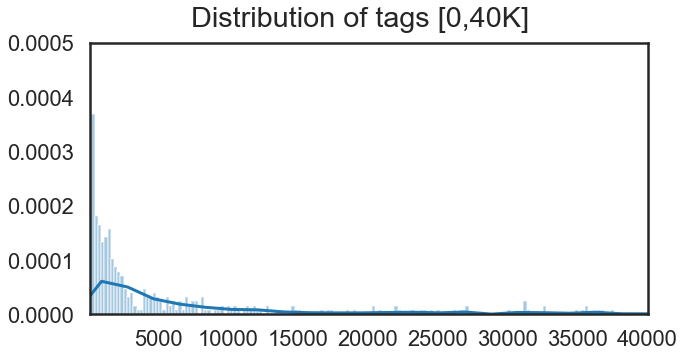

In [77]:
f, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim([100, 40000])
ax.set_ylim([0, .0005])
sns.distplot([x for x in table_needed['tag'].value_counts()], bins=1000)
plt.suptitle('Distribution of tags [0,40K]')

C:\Users\afern\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'KDE of tags')

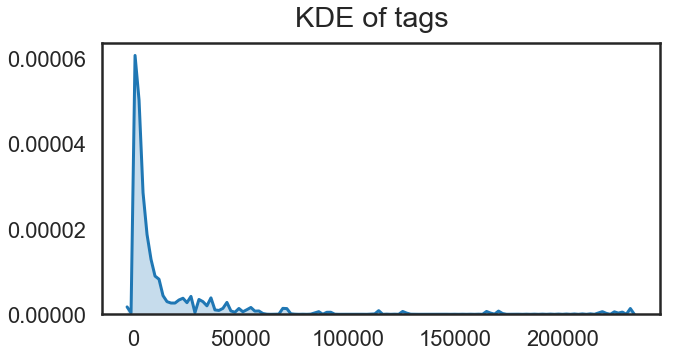

In [78]:
f, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot([x for x in table_needed['tag'].value_counts()], shade=True)
plt.suptitle('KDE of tags')

In [141]:
pd.DataFrame(table_needed['tag'].value_counts()).to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/desired_tags.csv', index=True)

In [50]:
pd.options.display.max_rows = 999
pd.DataFrame(table_needed['tag'].value_counts())[0:100]

,tag
preparation,230546
time-to-make,225326
course,218148
main-ingredient,170446
dietary,165091
easy,126062
occasion,114145
cuisine,91165
low-in-something,85776
main-dish,71786


In [284]:
recipe_tags = pd.DataFrame()
table_needed = df.join(s)[['id', 'tag']]
recipe_tags['id'] = table_needed['id'].unique()
# df_dummies = pd.get_dummies(table_needed['tag'])

In [289]:
table_needed.drop_duplicates().shape

(4141688, 2)

In [7]:
lst_col = 'tags'
df = df_rec_raw.copy()

# s = df.apply(lambda x: pd.Series(x['tags'].replace('[','').replace(']','').split(',')),axis=1).stack().reset_index(level=1, drop=True)
# s.name = 'tag'
# recipe_tags = pd.get_dummies(df.drop('tags', axis=1).join(s)[['id', 'tag']])
nut = pd.DataFrame()
nut['id']=df['id']
nut['cals'] = df['nutrition'].apply(lambda x: parse_array_w_index(x, 0))
nut['perc_d_fat'] = df['nutrition'].apply(lambda x: parse_array_w_index(x, 1))
nut['perc_d_sugar'] = df['nutrition'].apply(lambda x: parse_array_w_index(x, 2))
nut['perc_d_sodium'] = df['nutrition'].apply(lambda x: parse_array_w_index(x, 3))
nut['perc_d_protein'] = df['nutrition'].apply(lambda x: parse_array_w_index(x, 4))
nut['perc_d_sat_fat'] = df['nutrition'].apply(lambda x: parse_array_w_index(x, 5))
nut['perc_d_carbs'] = df['nutrition'].apply(lambda x: parse_array_w_index(x, 6))

In [79]:
nut['minutes'] = df['minutes']
nut['n_steps'] = df['n_steps']

In [150]:
nut.head()

,id,cals,perc_d_fat,perc_d_sugar,perc_d_sodium,perc_d_protein,perc_d_sat_fat,perc_d_carbs,minutes,n_steps
0,137739,51.5,0.0,13.0,0.0,2.0,0.0,4.0,55,11
1,31490,173.4,18.0,0.0,17.0,22.0,35.0,1.0,30,9
2,112140,269.8,22.0,32.0,48.0,39.0,27.0,5.0,130,6
3,59389,368.1,17.0,10.0,2.0,14.0,8.0,20.0,45,11
4,44061,352.9,1.0,337.0,23.0,3.0,0.0,28.0,190,5


In [333]:
users_to_rec.head()

,u,recipe_id
0,0,1118
0,0,27680
0,0,32541
0,0,137353
0,0,16428


In [8]:
users_to_rec = df_users.apply(lambda x: pd.Series(x['items'].replace('[','').replace(']','').split(',')),axis=1).stack().reset_index(level=1, drop=True)
users_to_rec.name = 'recipe_id'
users_to_rec=df_users.join(users_to_rec)[['u', 'recipe_id']]
users_to_rec.head()

,u,recipe_id
0,0,1118
0,0,27680
0,0,32541
0,0,137353
0,0,16428


In [175]:
recipe_tags.head()

,id,tag_ '1-day-or-more',tag_ '15-minutes-or-less',tag_ '3-steps-or-less',tag_ '30-minutes-or-less',tag_ '4-hours-or-less',tag_ '5-ingredients-or-less',tag_ '60-minutes-or-less',tag_ 'a1-sauce',tag_ 'african',...,tag_'lactose',tag_'less_thansql:name_topics_of_recipegreater_than',tag_'low-protein',tag_'main-ingredient',tag_'number-of-servings',tag_'occasion',tag_'oysters',tag_'preparation',tag_'time-to-make',tag_'weeknight'
0,137739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,137739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,137739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,137739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,137739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
users_to_rec.recipe_id = users_to_rec.recipe_id.astype(int)
nut.id = nut.id.astype(int)
# recipe_tags.id = recipe_tags.id.astype(int)

df_user_to_rec = users_to_rec.merge(nut,  how='left', left_on=['recipe_id'], right_on=['id']).drop('id', axis=1)

In [81]:
df_user_to_rec_grouped = df_user_to_rec.groupby('u')[df_user_to_rec.columns[2:]].mean()

In [83]:
df_user_to_rec_grouped.head()

,cals,perc_d_fat,perc_d_sugar,perc_d_sodium,perc_d_protein,perc_d_sat_fat,perc_d_carbs,minutes,n_steps
u,,,,,,,,,
0,454.553333,33.666667,66.666667,39.466667,35.200000,53.200000,15.066667,46.800000,8.466667
1,437.495238,38.142857,50.190476,29.333333,32.904762,43.714286,11.761905,127.142857,9.619048
2,530.708333,42.166667,97.166667,36.416667,30.500000,56.416667,18.416667,80.000000,9.000000
3,527.191304,40.533181,93.205950,36.075515,40.344394,51.144165,17.060641,190.053776,9.379863
4,548.589573,40.189573,111.545024,30.355450,41.023697,48.658768,18.587678,297.876777,9.374408


In [217]:
recipe_tags.head(3)

,id,tag_ '1-day-or-more',tag_ '15-minutes-or-less',tag_ '3-steps-or-less',tag_ '30-minutes-or-less',tag_ '4-hours-or-less',tag_ '5-ingredients-or-less',tag_ '60-minutes-or-less',tag_ 'a1-sauce',tag_ 'african',...,tag_'lactose',tag_'less_thansql:name_topics_of_recipegreater_than',tag_'low-protein',tag_'main-ingredient',tag_'number-of-servings',tag_'occasion',tag_'oysters',tag_'preparation',tag_'time-to-make',tag_'weeknight'
0,137739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,137739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,137739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
recipe_tags.columns = ['%s_' % (list(recipe_tags.columns).index(x)) + x.replace(' ', '_').replace("'", "").replace('__', '_').replace(':', '') for x in list(recipe_tags.columns)]

In [281]:
recipe_tags[recipe_tags['0_id']==32541]

,0_id,1_tag_1-day-or-more,2_tag_15-minutes-or-less,3_tag_3-steps-or-less,4_tag_30-minutes-or-less,5_tag_4-hours-or-less,6_tag_5-ingredients-or-less,7_tag_60-minutes-or-less,8_tag_a1-sauce,9_tag_african,...,563_tag_lactose,564_tag_less_thansqlname_topics_of_recipegreater_than,565_tag_low-protein,566_tag_main-ingredient,567_tag_number-of-servings,568_tag_occasion,569_tag_oysters,570_tag_preparation,571_tag_time-to-make,572_tag_weeknight
28320,32541,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28320,32541,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28320,32541,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28320,32541,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28320,32541,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28320,32541,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28320,32541,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28320,32541,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28320,32541,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28320,32541,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
def flatten_recipe_data(df):
    df = df.fillna(0)
    new_df = pd.DataFrame()
    new_df[id] = df['0_id'].unique()
    for col in df.columns[1:]:
        new_df[col] = df.groupby('0_id')[col].sum(axis=0)
    return new_df

In [147]:
recipe_tags.head()

NameError: name 'recipe_tags' is not defined

In [276]:
df_22 = flatten_recipe_data(recipe_tags[])

In [277]:
df_22.head()

,2121915919216,1_tag_1-day-or-more,2_tag_15-minutes-or-less,3_tag_3-steps-or-less,4_tag_30-minutes-or-less,5_tag_4-hours-or-less,6_tag_5-ingredients-or-less,7_tag_60-minutes-or-less,8_tag_a1-sauce,9_tag_african,...,563_tag_lactose,564_tag_less_thansqlname_topics_of_recipegreater_than,565_tag_low-protein,566_tag_main-ingredient,567_tag_number-of-servings,568_tag_occasion,569_tag_oysters,570_tag_preparation,571_tag_time-to-make,572_tag_weeknight
0,137739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,112140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,59389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
df_user_to_rec_new = df_user_to_rec.merge(recipe_tags,  how='left', left_on=['recipe_id'], right_on=['id'])

In [199]:
pd.DataFrame(recipe_tags)

,id,tag_ '1-day-or-more',tag_ '15-minutes-or-less',tag_ '3-steps-or-less',tag_ '30-minutes-or-less',tag_ '4-hours-or-less',tag_ '5-ingredients-or-less',tag_ '60-minutes-or-less',tag_ 'a1-sauce',tag_ 'african',...,tag_'lactose',tag_'less_thansql:name_topics_of_recipegreater_than',tag_'low-protein',tag_'main-ingredient',tag_'number-of-servings',tag_'occasion',tag_'oysters',tag_'preparation',tag_'time-to-make',tag_'weeknight'
0,137739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,137739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,137739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,137739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,137739,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231636,298509,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231636,298509,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231636,298509,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231636,298509,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_user_to_rec

,u,recipe_id,cals,perc_d_fat,perc_d_sugar,perc_d_sodium,perc_d_protein,perc_d_sat_fat,perc_d_carbs
0,0,1118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,27680,414.7,0.0,414.0,0.0,0.0,0.0,35.0
2,0,32541,308.9,24.0,4.0,14.0,56.0,33.0,3.0
3,0,137353,356.6,30.0,19.0,26.0,37.0,55.0,9.0
4,0,16428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
698896,25073,172034,635.7,32.0,38.0,21.0,73.0,37.0,25.0
698897,25074,157808,223.8,16.0,44.0,3.0,10.0,6.0,9.0
698898,25074,159896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698899,25075,166686,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_user_to_rec.columns

Index(['u', 'recipe_id', 'cals', 'perc_d_fat', 'perc_d_sugar', 'perc_d_sodium',
       'perc_d_protein', 'perc_d_sat_fat', 'perc_d_carbs'],
      dtype='object')

In [120]:
df_for_clustering = df_users[['u', 'avg_rating', 'mode_rating', 'var_rating']].merge(df_user_to_rec_grouped, on='u', how='left').fillna(0)

In [27]:
df_for_clustering.shape

(25076, 11)

In [121]:
df_for_clustering.head()

,u,avg_rating,mode_rating,var_rating,cals,perc_d_fat,perc_d_sugar,perc_d_sodium,perc_d_protein,perc_d_sat_fat,perc_d_carbs,minutes,n_steps
0,0,4.806452,5,0.161290,454.553333,33.666667,66.666667,39.466667,35.200000,53.200000,15.066667,46.800000,8.466667
1,1,4.948718,5,0.049933,437.495238,38.142857,50.190476,29.333333,32.904762,43.714286,11.761905,127.142857,9.619048
2,2,4.222222,4,0.256410,530.708333,42.166667,97.166667,36.416667,30.500000,56.416667,18.416667,80.000000,9.000000
3,3,4.821547,5,0.236652,527.191304,40.533181,93.205950,36.075515,40.344394,51.144165,17.060641,190.053776,9.379863
4,4,4.388298,5,0.910156,548.589573,40.189573,111.545024,30.355450,41.023697,48.658768,18.587678,297.876777,9.374408


In [134]:
from sklearn import preprocessing
def min_max_normalize(df, list_columns):
    df_copy = df.copy()
    for col in list_columns:
        x = df_copy[col].values.reshape(-1, 1) #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        df_copy[col] = pd.DataFrame(x_scaled)
    return df_copy

In [137]:
df_for_clustering_norm = min_max_normalize(df_for_clustering, list(df_for_clustering.columns[df_for_clustering.columns.isin(['u'])==False]))

C:\Users\afern\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [144]:
df_for_clustering_norm.shape

In [145]:
df_for_clustering_norm.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_for_clustering_norm.csv')

In [138]:
df_for_clustering_norm.head()

,u,avg_rating,mode_rating,var_rating,cals,perc_d_fat,perc_d_sugar,perc_d_sodium,perc_d_protein,perc_d_sat_fat,perc_d_carbs,minutes,n_steps
0,0,0.961290,1.0,0.012903,0.021025,0.028423,0.013915,0.004179,0.032000,0.029955,0.012994,0.000542,0.148538
1,1,0.989744,1.0,0.003995,0.020236,0.032202,0.010476,0.003106,0.029913,0.024614,0.010144,0.001472,0.168755
2,2,0.844444,0.8,0.020513,0.024548,0.035599,0.020281,0.003856,0.027727,0.031766,0.015883,0.000926,0.157895
3,3,0.964309,1.0,0.018932,0.024385,0.034220,0.019454,0.003820,0.036677,0.028797,0.014714,0.002200,0.164559
4,4,0.877660,1.0,0.072812,0.025375,0.033930,0.023282,0.003215,0.037294,0.027398,0.016031,0.003448,0.164463


In [88]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.500000,0.880403,0.956000,0.066884,0.194647,0.189544,0.226940,0.016435,0.385110,0.288100,0.155457,0.061801,0.728704
std,0.293045,0.149583,0.167163,0.119265,0.102609,0.109654,0.133858,0.099517,0.150815,0.140025,0.103481,0.108117,0.179581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.857175,1.000000,0.019232,0.167640,0.156705,0.151475,0.004607,0.362191,0.253816,0.118802,0.027473,0.708560
50%,0.500000,0.921226,1.000000,0.040068,0.200306,0.190667,0.234625,0.005993,0.401576,0.293416,0.157095,0.037604,0.782097
75%,0.750000,0.964803,1.000000,0.071812,0.214802,0.215762,0.277815,0.007480,0.444687,0.323675,0.171880,0.056552,0.809404
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
df_for_clustering[0:50]

,u,avg_rating,mode_rating,var_rating,cals,perc_d_fat,perc_d_sugar,perc_d_sodium,perc_d_protein,perc_d_sat_fat,perc_d_carbs,minutes,n_steps
0,0,4.806452,5,0.161290,454.553333,33.666667,66.666667,39.466667,35.200000,53.200000,15.066667,46.800000,8.466667
1,1,4.948718,5,0.049933,437.495238,38.142857,50.190476,29.333333,32.904762,43.714286,11.761905,127.142857,9.619048
2,2,4.222222,4,0.256410,530.708333,42.166667,97.166667,36.416667,30.500000,56.416667,18.416667,80.000000,9.000000
3,3,4.821547,5,0.236652,527.191304,40.533181,93.205950,36.075515,40.344394,51.144165,17.060641,190.053776,9.379863
4,4,4.388298,5,0.910156,548.589573,40.189573,111.545024,30.355450,41.023697,48.658768,18.587678,297.876777,9.374408
5,5,4.037931,4,0.721740,584.360606,46.381818,119.763636,35.442424,38.581818,66.284848,19.618182,77.230303,8.793939
6,6,5.000000,5,0.000000,533.000000,53.000000,37.000000,38.000000,50.000000,49.000000,10.000000,15.000000,4.000000
7,7,1.125000,0,4.250000,240.442857,19.571429,32.285714,19.000000,25.571429,19.142857,5.571429,53.428571,7.571429
8,8,4.551724,5,0.854456,532.313768,47.217391,70.695652,24.934783,37.463768,53.840580,14.536232,133.253623,10.275362
9,9,4.500000,5,0.700000,301.833333,19.666667,46.333333,51.000000,31.666667,32.666667,10.333333,50.000000,9.333333


In [299]:
!python -m pip install --upgrade pip

  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1


In [14]:
import hdbscan

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, gen_min_span_tree=True)
clusterer.fit(df_for_clustering[df_for_clustering.columns[1:]].sample(n=1000, random_state=123))

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=50, min_samples=None, p=None,
    prediction_data=False)

In [18]:
?clusterer.minimum_spanning_tree_.plot

Signature: clusterer.minimum_spanning_tree_.plot(axis=None, node_size=40, node_color='k', node_alpha=0.8, edge_alpha=0.5, edge_cmap='viridis_r', edge_linewidth=2, vary_line_width=True, colorbar=True)
Docstring:
Plot the minimum spanning tree (as projected into 2D by t-SNE if required).

Parameters
----------

axis : matplotlib axis, optional
       The axis to render the plot to

node_size : int, optional
        The size of nodes in the plot (default 40).

node_color : matplotlib color spec, optional
        The color to render nodes (default black).

node_alpha : float, optional
        The alpha value (between 0 and 1) to render nodes with
        (default 0.8).

edge_cmap : matplotlib colormap, optional
        The colormap to color edges by (varying color by edge
            weight/distance). Can be a cmap object or a string
            recognised by matplotlib. (default `viridis_r`)

edge_alpha : float, optional
        The alpha value (between 0 and 1) to render edges with
     

In [34]:
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

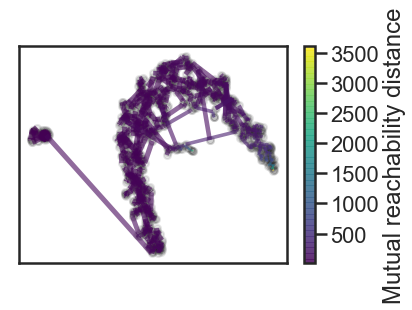

In [35]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6, node_alpha =.1,
                                      node_size=50,
                                      edge_linewidth=1)

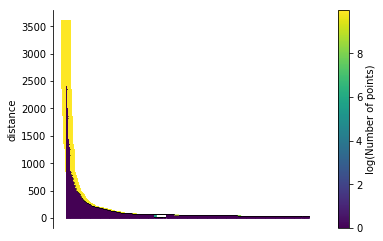

In [31]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

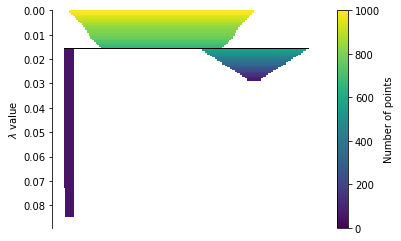

In [32]:
clusterer.condensed_tree_.plot()

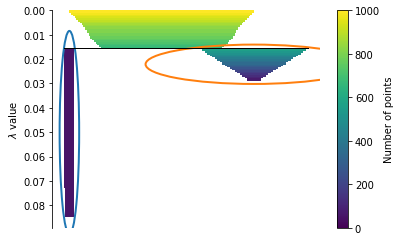

In [33]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [37]:
df_rec_raw['tags'][0:10].to_string()

"0    ['60-minutes-or-less', 'time-to-make', 'course...\n1    ['30-minutes-or-less', 'time-to-make', 'course...\n2    ['time-to-make', 'course', 'preparation', 'mai...\n3    ['60-minutes-or-less', 'time-to-make', 'course...\n4    ['weeknight', 'time-to-make', 'course', 'main-...\n5    ['15-minutes-or-less', 'time-to-make', 'course...\n6    ['15-minutes-or-less', 'time-to-make', 'course...\n7    ['weeknight', 'time-to-make', 'course', 'main-...\n8    ['weeknight', 'time-to-make', 'course', 'main-...\n9    ['weeknight', 'time-to-make', 'course', 'main-..."

In [33]:
pd.set_option('display.max_colwidth', -1)
df_rec_raw[df_rec_raw.id==32541]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
28320,breaded pork chops from the oven,32541,45,37636,2002-06-29,"['60-minutes-or-less', 'time-to-make', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'pork', 'american', 'oven', 'easy', 'dietary', 'comfort-food', 'high-protein', 'low-carb', 'high-in-something', 'low-in-something', 'meat', 'pork-chops', 'taste-mood', 'equipment']","[308.9, 24.0, 4.0, 14.0, 56.0, 33.0, 3.0]",9,"['preheat oven to 375 degrees f', 'beat egg with evaporated milk', 'place chops in milk and allow to sit 5-10 minutes , turning so that each side gets down into the milk', 'mix together crushed cornflakes , breadcrumbs , paprika , oregano , garlic , onion powder , salt , black pepper , and cayenne', 'take chops out of the milk and coat with the seasoned crumbs', 'spray a shallow baking pan with non-stick cooking spray', 'place chops on pan', 'bake chops at 375 degrees f for 20 minutes', 'turn over and cook 15 minutes more or until juices run clear']",these chops are tender and juicy with a nice crisp coating. you'll like these!,"['center-cut pork chops', 'egg', 'evaporated milk', 'corn flakes', 'breadcrumbs', 'paprika', 'dried oregano', 'garlic powder', 'onion powder', 'salt', 'black pepper', 'cayenne pepper', 'nonstick cooking spray']",13


In [7]:
dict_rec_raw = {'name': 'recipe name', 
                'id': 'recipe',
                'minutes': '# minutes',
                'contributor': 'user who posted',
                'submitted': 'date submitted',
                'tags': 'recipe tags',
                'nutrition': '?',
                'n_steps': '# steps',
                'steps': 'array of steps',
                'description': 'recipe desc',
                'ingredients': 'unclean ingredients',
                'n_ingredients': '# ingredients'
               }
dict_rec_raw

In [7]:
df_rec_raw.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [44]:
df_int_raw.groupby('recipe_id').agg({'user_id':lambda x: list(x), 'rating':lambda x: list(x), 'review':lambda x: list(x)}).reset_index()

,recipe_id,user_id,rating,review
0,38,"[596506, 1060485, 1802956262, 2123645]","[5, 4, 4, 4]","[Yummy, yummy, yummy! I am a big fan of fruit and yogurt together, and this was a very good mix!, very good!! the directions were alittle weird though..., This does taste great! I think the recipe needs a bit less berries and a little bit more yogurt though. The result is still very berry!, Tasty and refreshing! I love the creamy flavor the vanilla yogurt adds. I didn&#039;t put mine in a mold, but instead just served it up like ice cream.]"
1,39,[393254],[3],"[I have an Indian friend who made this dish for my family. This recipe tastes almost like it, but I think some of the proportions for the spices is off. I definitely think it calls for too much saffron (my rice was too yellow). I think it should be just a pinch. I will definitely try it again, but will probably tweak it!]"
2,40,"[59064, 70154, 39949, 132353, 172249, 541967, 715828, 1060485, 851190]","[5, 1, 4, 5, 4, 5, 5, 5, 5]","[My favourite lemonade recipe is essentially the same as this. Allowing the sugar to absorb the lemon oils is what makes it so delicious. The syrup is quite concentrated so a little goes a long way. I usually use the zest of 4 lemons, their juice and 1 cup of boiling water and 1 cup sugar. It's good old fashioned lemonade. Use mineral water to dilute the syrup and you get a great fizzy drink., complicated recipe but cool., The taste was excellent, and it really wasn't difficult to make at all. My stepdaughter and I did this one afternoon, and everything turned out great; the only change we made was to add more hot water to dissolve the sugar; the amount called for was not quite enough. Very good taste, especially with the lemon zest. Excellent recipe we'll use often., I made this with limes instead of lemosn and it was the best limeade i've ever had! sooo good!, Really nice lemonade. Used a potato peeler to get the zest off. No white comes off if you do it in a light pressure zig zag. After it chilled the children loved the zest sprinkled with more sugar., My parents went like wow when they dranked it! :), FANTASTIC!!! Added some oranges because we didn't have enough lemons. I think I'll be making this for my daughters birthday party!!!, This was awesome!! it was REALLY refreashing!, It was hot the other day and I decided to make some lemonade. This really quenched our thirst and was awesome!]"
3,41,"[57256, 1060485]","[5, 4]","[I thought this was very GOOD! ANYONE who is afraid of Tofu should try it this way. It gets a great smokey taste from being grilled and the veggies take on a nice sweetness when cooked this way!, This was SOO good! the marinade was awesome!! although i am not a big fan of tofu, it definally had some nice flavor. thanks!]"
4,43,[1060485],[1],[did not work.]
...,...,...,...,...
231632,537459,[305531],[5],"[Yum. What's not to like with this one. It was simple, good, and potent. Thanks for sharing, Bonnie.]"
231633,537485,[2001297534],[5],[I made this recipe as written. It was easy to put together and was quite tasty. Thanks for sharing.]
231634,537543,[2002102502],[0],[I Didn't see pumpkin puree in ingredients just applesauce but it is listed in directions. Can you please verify for me as I love ginger loaf. Thank you and best regards! Happy Christmas! Laura Finch]
231635,537671,[2002326807],[0],"[These are an absolute work of art, but just too tedious and time consuming for my time in life. Hooray and best wishes to those who endeavor to do them. Again luxeandthelady THEY ARE ABSOLUTELY AMAZING!!!!]"


In [8]:
df_int_raw.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [172]:
import pickle

In [173]:
pkl_ing = pickle.load( open('data/food-com-recipes-and-user-interactions/ingr_map.pkl', "rb" ))

In [35]:
pkl_ing[pkl_ing.id==2732]

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
3128,french parfait amour liqueur,4,french parfait amour liqueur,28,french parfait amour liqueur,2,2732


In [14]:
pkl_ing.head()

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308


# NEW WORK

In [149]:
df_rec_raw.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


### Ingredients

In [175]:
#ingredients
pkl_ing = pd.read_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/ingredient_list.csv')

In [176]:
pkl_ing.head()

,raw_ingr,replaced
0,"medium heads bibb or red leaf lettuce, washed,...",lettuce
1,mixed baby lettuces and spring greens,lettuce
2,romaine lettuce leaf,lettuce
3,iceberg lettuce leaf,lettuce
4,red romaine lettuce,lettuce


In [180]:
df_step.ingredients.head()

0    ['winter squash', 'mexican seasoning', 'mixed ...
1    ['prepared pizza crust', 'sausage patty', 'egg...
2    ['ground beef', 'yellow onions', 'diced tomato...
3    ['spreadable cheese with garlic and herbs', 'n...
4    ['tomato juice', 'apple cider vinegar', 'sugar...
Name: ingredients, dtype: object

In [202]:
new_dict = dict(zip(pkl_ing.raw_ingr, pkl_ing.replaced))

In [231]:
df_step = df_rec_raw
df_ingredients_clean = df_step.apply(lambda x: pd.Series(x['ingredients'].replace('[','').replace(']','').replace("'", "").replace('"', '').split(',')),axis=1).stack().reset_index(level=1, drop=True)
df_ingredients_clean = df_ingredients_clean.map(lambda x: new_dict.get(x.strip(), x.strip()), na_action='ignore')
df_ingredients_clean.name = 'clean_ingredients'
df_ingredients_clean=df_step.join(df_ingredients_clean)[['id','clean_ingredients']]

In [234]:
df_rec_raw.shape

(231637, 12)

In [295]:
df_ingredients_clean.shape

(2103719, 2)

In [297]:
# df_ingredients_clean.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_ingredients.csv', index=False)

In [233]:
df_ingredients_clean.clean_ingredients.value_counts()

salt                              85758
butter                            55109
egg                               51065
onion                             48945
sugar                             44535
                                  ...  
simply potatoes                       1
hazelnut powder                       1
3-inch pie pastry tart shells         1
nutty wheat flour                     1
sugar-free black cherry jell-o        1
Name: clean_ingredients, Length: 11324, dtype: int64

In [237]:
df_ingredients_clean_cnts = df_ingredients_clean.clean_ingredients.value_counts().reset_index()

In [298]:
# df_ingredients_clean_cnts.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_ingredients_counts.csv', index=False)

In [240]:
df_ingredients_clean_cnts.head()

,index,clean_ingredients
0,salt,85758
1,butter,55109
2,egg,51065
3,onion,48945
4,sugar,44535


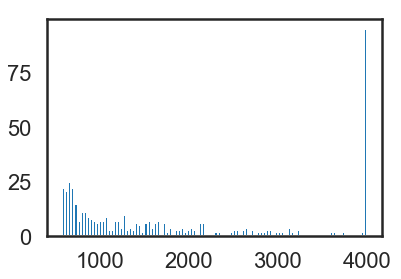

In [294]:
import matplotlib.pyplot as plt
x_vals = [min(x, 4000) for x in df_ingredients_clean_cnts['clean_ingredients'] if x > 579]
plt.hist(x_vals, bins=100)
plt.show()

In [293]:
df_rec_raw.shape[0]*.0025

579.0925

In [292]:
df_ingredients_clean_cnts[df_ingredients_clean_cnts['clean_ingredients'] > df_rec_raw.shape[0]*.0025].shape

In [469]:
list_ingr_shortlist = df_ingredients_clean_cnts[df_ingredients_clean_cnts['clean_ingredients'] > df_rec_raw.shape[0]*.0025]['index'].unique()

In [472]:
df_ingredients_clean.shape

(2103719, 2)

In [475]:
df_ingredients_clean.head(2)

,id,clean_ingredients
0,137739,winter squash
0,137739,mexican seasoning


In [476]:
df_ingr_dummied = pd.get_dummies(df_ingredients_clean[df_ingredients_clean.clean_ingredients.isin(list_ingr_shortlist)],prefix_sep="__", 
                                 columns=['clean_ingredients']).groupby('id').sum().reset_index()

In [477]:
df_ingr_dummied.head(2)

,id,clean_ingredients__all-purpose flmy,clean_ingredients__allspice,clean_ingredients__almond,clean_ingredients__almond extract,clean_ingredients__american cheese,clean_ingredients__apple,clean_ingredients__apple cider,clean_ingredients__apple cider vinegar,clean_ingredients__apple juice,...,clean_ingredients__worcestershire sauce,clean_ingredients__yeast,clean_ingredients__yellow bell pepper,clean_ingredients__yellow cornmeal,clean_ingredients__yellow mustard,clean_ingredients__yellow onion,clean_ingredients__yellow squash,clean_ingredients__yogurt,clean_ingredients__zest of,clean_ingredients__zucchini
0,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [478]:
# df_ingr_dummied.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_ingr.csv', index=False)

### Days Since

In [456]:
#days_since
df_step = df_rec_raw
df_step['num_days'] = max(df_rec_raw.submitted.astype('datetime64[ns]')) - df_step['submitted'].astype('datetime64[ns]')
df_days_since = df_step[['id', 'num_days']].copy()
del df_steps

In [457]:
# df_days_since.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_days_since.csv', index=False)

### Nutrition

In [151]:
#nutrition
nut.head()

,id,cals,perc_d_fat,perc_d_sugar,perc_d_sodium,perc_d_protein,perc_d_sat_fat,perc_d_carbs,minutes,n_steps
0,137739,51.5,0.0,13.0,0.0,2.0,0.0,4.0,55,11
1,31490,173.4,18.0,0.0,17.0,22.0,35.0,1.0,30,9
2,112140,269.8,22.0,32.0,48.0,39.0,27.0,5.0,130,6
3,59389,368.1,17.0,10.0,2.0,14.0,8.0,20.0,45,11
4,44061,352.9,1.0,337.0,23.0,3.0,0.0,28.0,190,5


In [299]:
# nut.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_nutrition.csv', index=False)

### Tags

In [319]:
%%time
#tags
df_step = df_rec_raw

lst_col = 'tags'

s = df_step.apply(lambda x: pd.Series(x['tags'].replace('[','').replace(']','').replace(' ', '').replace("'", "").replace('__', '_').replace(':', '').split(',')),axis=1)\
            .stack().reset_index(level=1, drop=True)
s.name = 'tag'
table_needed = df_step.join(s)[['id', 'tag']]

Wall time: 4min 26s


In [304]:
want_tags = pd.read_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/desired_tags.csv')

In [318]:
want_tags.describe()

,count,keep
count,552.000000,552.000000
mean,7503.057971,0.518116
std,23358.831344,0.500125
min,1.000000,0.000000
25%,96.250000,0.000000
50%,757.500000,1.000000
75%,4240.500000,1.000000
max,230546.000000,1.000000


In [320]:
table_needed.shape

(4141688, 2)

In [322]:
len(table_needed.tag.unique())

552

In [321]:
tb2 = table_needed[table_needed['tag'].isin(want_tags[want_tags['keep']>0]['tag'].unique())]

In [323]:
len(tb2.tag.unique())

286

In [324]:
tb2.head()

,id,tag
0,137739,60-minutes-or-less
0,137739,occasion
0,137739,north-american
0,137739,side-dishes
0,137739,vegetables


In [329]:
%%time
tb3 = pd.get_dummies(tb2, prefix_sep="__",
                              columns=['tag']).groupby('id').sum().reset_index()

Wall time: 1min 52s


In [331]:
tb3.head()

,id,tag__1-day-or-more,tag__15-minutes-or-less,tag__3-steps-or-less,tag__30-minutes-or-less,tag__4-hours-or-less,tag__5-ingredients-or-less,tag__60-minutes-or-less,tag__african,tag__american,...,tag__vegetarian,tag__very-low-carbs,tag__vietnamese,tag__water-bath,tag__weeknight,tag__whole-chicken,tag__whole-turkey,tag__winter,tag__yams-sweet-potatoes,tag__yeast
0,38,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,40,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,41,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,43,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [332]:
tb3.shape

(231525, 287)

In [330]:
# tb3.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_tags.csv', index=False)

### Description

In [ ]:
#description

### Number Tried

In [339]:
#number tried
num_tried = users_to_rec['recipe_id'].value_counts().reset_index()

In [340]:
num_tried.head()

,index,recipe_id
0,99787,1091
1,134610,1075
2,135961,897
3,117899,894
4,147374,787


In [341]:
# num_tried.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_num_tried.csv', index=False)

In [342]:
num_tried.shape

(160901, 2)

### Target Variable

In [416]:
%%time
#ratings
df_step = df_users

s = df_step.apply(lambda x: pd.Series(x['ratings'].replace('[','').replace(']','').replace(' ', '').split(',')),axis=1)\
            .stack().reset_index(level=1, drop=True)
s.name = 'rating'

w = df_step.apply(lambda x: pd.Series(x['items'].replace('[','').replace(']','').replace(' ', '').split(',')),axis=1)\
            .stack().reset_index(level=1, drop=True)
w.name = 'recipe_id'

mid_step = df_step.join(s)[['u', 'rating']]
sec_mid_step = df_step.join(w)[['u', 'recipe_id']]

ratings_merge = pd.concat([mid_step, sec_mid_step['recipe_id']], axis=1)
del mid_step; del sec_mid_step; del df_step;

Wall time: 6min 5s


In [417]:
ratings_merge.shape

(698901, 3)

In [418]:
ratings_merge.head()

,u,rating,recipe_id
0,0,5.0,1118
0,0,5.0,27680
0,0,5.0,32541
0,0,5.0,137353
0,0,5.0,16428


In [419]:
# ratings_merge.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_ratings_pre_cluster_map.csv', index=False)

#### All

In [423]:
ratings_merge.rating = pd.to_numeric(ratings_merge.rating)

In [424]:
ratings_merge.head()

,u,rating,recipe_id
0,0,5.0,1118
0,0,5.0,27680
0,0,5.0,32541
0,0,5.0,137353
0,0,5.0,16428


In [425]:
df_mod_all_ratings = ratings_merge[['recipe_id', 'rating']].groupby('recipe_id')['rating'].mean().reset_index()

In [426]:
df_mod_all_ratings.describe()

,rating
count,160901.000000
mean,4.503302
std,0.791696
min,0.000000
25%,4.142857
50%,4.833333
75%,5.000000
max,5.000000


In [427]:
df_mod_all_ratings.head()

,recipe_id,rating
0,0,4.5
1,1,4.0
2,10,5.0
3,100,4.5
4,1000,5.0


In [428]:
# df_mod_all_ratings.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_all_target.csv', index=False)

#### Clusters

In [553]:
df_user_clusters = pd.read_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_clust_9.csv')[['u', 'cluster']]
df_user_clusters = dict(zip(df_user_clusters['u'], df_user_clusters['cluster']))

In [554]:
df_mod_cluster_ratings = ratings_merge[['u','recipe_id', 'rating']]

In [555]:
df_mod_cluster_ratings.u = df_mod_cluster_ratings.u.map(lambda x: df_user_clusters.get(x), na_action='ignore')

In [556]:
df_mod_cluster_ratings.u.value_counts()

profile_0    525152
profile_4    133051
profile_7     12583
profile_3      8811
profile_8      7353
profile_1      4595
profile_6      2698
profile_5      2589
profile_2      2069
Name: u, dtype: int64

In [557]:
df_mod_cluster_ratings = df_mod_cluster_ratings.groupby(['recipe_id', 'u'])['rating'].mean().reset_index()

In [558]:
df_mod_cluster_ratings.rating.value_counts()

5.000000    124606
4.000000     39931
4.500000     13047
3.000000      8877
4.666667      6253
             ...  
3.761062         1
3.111111         1
2.375000         1
4.745455         1
4.596491         1
Name: rating, Length: 1155, dtype: int64

In [559]:
df_mod_cluster_ratings.shape

(235359, 3)

In [560]:
df33 = df_mod_cluster_ratings.pivot_table(values='rating', index=['recipe_id'],
                    columns=['u'], aggfunc=np.sum).reset_index()

In [561]:
df33.describe()

u,profile_0,profile_1,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,profile_8
count,146218.000000,3768.000000,1499.000000,5805.000000,62124.000000,1769.000000,1856.000000,7405.000000,4915.000000
mean,4.641793,2.074640,4.622490,4.640455,4.039619,4.692100,4.608679,4.686692,4.680870
std,0.658907,2.119646,0.843214,0.792914,1.215080,0.654825,0.874359,0.663106,0.754123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,0.000000,4.500000,4.542857,4.000000,4.750000,4.600000,4.666667,4.833333
50%,5.000000,1.000000,5.000000,5.000000,4.200000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [450]:
for c in df33.columns[1:]:
    df33[c].fillna((df33[c].mean()), inplace=True)

In [451]:
df33.shape

(160901, 21)

In [552]:
df33.describe()

u,profile_0,profile_1,profile_10,profile_11,profile_12,profile_13,profile_14,profile_15,profile_16,profile_17,profile_18,profile_19,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,profile_8,profile_9
count,4531.000000,60001.000000,688.000000,6815.000000,1769.000000,1172.000000,145714.000000,2007.000000,1727.000000,383.000000,561.000000,2942.000000,1183.000000,4915.000000,1111.000000,699.000000,1856.000000,7405.000000,4345.000000,3216.000000
mean,4.609172,4.071990,0.366642,3.614765,4.692100,4.632229,4.643651,4.637026,4.623480,4.618430,4.605439,4.667145,4.624160,4.680870,4.611646,4.651147,4.608679,4.686692,4.644744,2.405978
std,0.882128,1.169541,0.998518,1.931706,0.654825,0.800052,0.659461,0.820763,0.870884,0.931115,0.951198,0.773734,0.828867,0.754123,0.924274,0.816574,0.874359,0.663106,0.798567,2.137689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,4.000000,0.000000,2.500000,4.750000,4.544988,4.500000,4.666667,4.666667,5.000000,5.000000,4.817708,4.569444,4.833333,4.896429,5.000000,4.600000,4.666667,4.666667,0.000000
50%,5.000000,4.200000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.500000
75%,5.000000,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [455]:
df33.head()

u,recipe_id,profile_0,profile_1,profile_10,profile_11,profile_12,profile_13,profile_14,profile_15,profile_16,...,profile_18,profile_19,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,profile_8,profile_9
0,0,4.609172,4.07199,0.366642,3.614765,4.6921,4.632229,4.500000,4.637026,4.62348,...,4.605439,4.667145,4.62416,4.68087,4.611646,4.651147,4.608679,4.686692,4.644744,2.405978
1,1,4.609172,4.00000,0.366642,3.614765,4.6921,4.632229,4.643651,4.637026,4.62348,...,4.605439,4.667145,4.62416,4.68087,4.611646,4.651147,4.608679,4.686692,4.644744,2.405978
2,10,4.609172,4.07199,0.366642,3.614765,4.6921,4.632229,5.000000,4.637026,4.62348,...,4.605439,4.667145,4.62416,4.68087,4.611646,4.651147,4.608679,4.686692,4.644744,2.405978
3,100,4.609172,4.07199,0.366642,3.614765,4.6921,4.632229,4.500000,4.637026,4.62348,...,4.605439,4.667145,4.62416,4.68087,4.611646,4.651147,4.608679,4.686692,4.644744,2.405978
4,1000,4.609172,4.07199,0.366642,3.614765,4.6921,4.632229,5.000000,4.637026,4.62348,...,4.605439,4.667145,4.62416,4.68087,4.611646,4.651147,4.608679,4.686692,4.644744,2.405978


In [562]:
# df33.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_cluster_target.csv', index=False)

### Compiling Data

In [479]:
df_rec_raw.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,num_days
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4827 days
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,6014 days


In [563]:
df_data = df_rec_raw[['id', 'minutes', 'n_steps', 'n_ingredients', 'num_days']]

In [564]:
for c in ['minutes', 'n_steps', 'n_ingredients']:
    df_data[c] = pd.to_numeric(df_data[c])
df_data['num_days'] = df_data['num_days'].dt.days
df_data.head()

C:\Users\afern\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\afern\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,minutes,n_steps,n_ingredients,num_days
0,137739,55,11,7,4827
1,31490,30,9,6,6014
2,112140,130,6,13,5030
3,59389,45,11,11,5713
4,44061,190,5,8,5884


In [565]:
df_data = df_data.merge(df_ingr_dummied, how='left', left_on='id', right_on='id')
df_data = df_data.merge(nut[nut.columns[:-2]], how='left', left_on='id', right_on='id')
# num_tried=num_tried.rename(columns={'index': 'id', 'recipe_id': 'num_users'})
df_data = df_data.merge(num_tried, how='left', left_on='id', right_on='id')
df_data['users_per_day'] = df_data['num_users']/df_data['num_days']
df_data = df_data.merge(tb3, how='left', left_on='id', right_on='id')
# df_mod_all_ratings['recipe_id'] = pd.to_numeric(df_mod_all_ratings['recipe_id'])
df_data = df_data.merge(df_mod_all_ratings, how='left', left_on='id', right_on='recipe_id')
df33['recipe_id'] = pd.to_numeric(df33['recipe_id'])
df33 = df33[['recipe_id']+['profile_%s' % x for x in range(0, 9)]]
df_data = df_data.merge(df33, how='left', left_on='id', right_on='recipe_id')

In [566]:
df_data.head(12)

,id,minutes,n_steps,n_ingredients,num_days,clean_ingredients__all-purpose flmy,clean_ingredients__allspice,clean_ingredients__almond,clean_ingredients__almond extract,clean_ingredients__american cheese,...,recipe_id_y,profile_0,profile_1,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,profile_8
0,137739,55,11,7,4827,0.0,0.0,0.0,0.0,0.0,...,137739.0,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
1,31490,30,9,6,6014,0.0,0.0,0.0,0.0,0.0,...,31490.0,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,112140,130,6,13,5030,0.0,0.0,0.0,0.0,0.0,...,112140.0,5.000000,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN
3,59389,45,11,11,5713,0.0,0.0,0.0,0.0,0.0,...,59389.0,4.000000,NaN,NaN,NaN,5.00,NaN,NaN,NaN,NaN
4,44061,190,5,8,5884,0.0,0.0,0.0,0.0,0.0,...,44061.0,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5289,0,4,4,6938,0.0,0.0,0.0,0.0,0.0,...,5289.0,4.945205,5.0,NaN,NaN,3.85,NaN,NaN,5.0,4.0
6,25274,15,4,9,6078,0.0,0.0,0.0,0.0,0.0,...,25274.0,5.000000,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN
7,67888,120,10,22,5606,0.0,0.0,0.0,0.0,0.0,...,67888.0,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,70971,180,8,6,5564,0.0,0.0,0.0,0.0,0.0,...,70971.0,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,75452,70,12,9,5509,0.0,0.0,0.0,0.0,0.0,...,75452.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN


In [567]:
df_data.shape

(231637, 800)

In [549]:
df_rec_raw.shape

(231637, 13)

In [568]:
# df_data.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_data_9clust.csv', index=False)

In [605]:
df_data.columns[-320:-300]

Index(['clean_ingredients__whole kernel corn', 'clean_ingredients__whole milk',
       'clean_ingredients__whole wheat flmy',
       'clean_ingredients__worcestershire sauce', 'clean_ingredients__yeast',
       'clean_ingredients__yellow bell pepper',
       'clean_ingredients__yellow cornmeal',
       'clean_ingredients__yellow mustard', 'clean_ingredients__yellow onion',
       'clean_ingredients__yellow squash', 'clean_ingredients__yogurt',
       'clean_ingredients__zest of', 'clean_ingredients__zucchini', 'cals',
       'perc_d_fat', 'perc_d_sugar', 'perc_d_sodium', 'perc_d_protein',
       'perc_d_sat_fat', 'perc_d_carbs'],
      dtype='object')

In [591]:
df_data[-20:].shape

(20, 800)

In [573]:
na_count = dict(zip(df_data.columns,df_data.isnull().sum(axis=1).tolist()))

In [606]:
na_count['cals']

In [607]:
print(na_count)

{'id': 7, 'minutes': 8, 'n_steps': 7, 'n_ingredients': 7, 'num_days': 8, 'clean_ingredients__all-purpose flmy': 4, 'clean_ingredients__allspice': 7, 'clean_ingredients__almond': 8, 'clean_ingredients__almond extract': 8, 'clean_ingredients__american cheese': 8, 'clean_ingredients__apple': 8, 'clean_ingredients__apple cider': 8, 'clean_ingredients__apple cider vinegar': 7, 'clean_ingredients__apple juice': 8, 'clean_ingredients__applesauce': 496, 'clean_ingredients__artichoke heart': 14, 'clean_ingredients__artificial sweetener': 8, 'clean_ingredients__asparagu': 494, 'clean_ingredients__ature marshmallow': 8, 'clean_ingredients__avocado': 7, 'clean_ingredients__baby carrot': 14, 'clean_ingredients__baby spinach': 8, 'clean_ingredients__bacon': 8, 'clean_ingredients__baking potato': 8, 'clean_ingredients__baking powder': 7, 'clean_ingredients__baking soda': 14, 'clean_ingredients__balsamic vinegar': 8, 'clean_ingredients__banana': 8, 'clean_ingredients__barbecue sauce': 8, 'clean_ingred

In [ ]:
'minutes' -> mean
'n_steps' -> mean
'n_ingredients' -> mean
'num_days' -> mean
'clean_ingredients__all-purpose flmy' -> 0
'num_users' -> mean
'users_per_day' -> mean
'cals'

In [608]:
df_data2 = df_data.copy()

In [ ]:
df_data = df_data.merge(df_ingr_dummied, how='left', left_on='id', right_on='id')

In [610]:
df_data2 = df_data2.merge(df_rec_raw[['id','name', 'steps', 'description']], how='left', left_on='id', right_on='id')

In [612]:
df_data.shape

(231637, 800)

In [611]:
df_data2.shape

(231637, 803)

In [613]:
# df_data2.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_data_9clust_with_name.csv', index=False)

In [2]:
import pandas as pd

In [3]:
df_data = pd.read_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_data_9clust_with_name.csv')

In [4]:
df_data.shape

(231637, 803)

In [11]:
df_data[['id', 'num_users', 'users_per_day']].describe()


,id,num_users,users_per_day
count,231637.000000,91412.000000,91412.000000
mean,222014.708984,4.341826,0.000811
std,141206.635626,13.478810,0.002526
min,38.000000,1.000000,0.000142
25%,99944.000000,1.000000,0.000193
50%,207249.000000,2.000000,0.000364
75%,333816.000000,4.000000,0.000730
max,537716.000000,1091.000000,0.210050


In [13]:
def fill_null_w_mean(df, varname):
    for c in varname:
        df[c] = df[c].map(lambda x: df[c].mean() if pd.isnull(x) else x)
    return df

In [14]:
df_data = fill_null_w_mean(df_data, ['num_users', 'users_per_day'])

In [15]:
df_data[['id', 'num_users', 'users_per_day']].describe()

,id,num_users,users_per_day
count,231637.000000,231637.000000,231637.000000
mean,222014.708984,4.341826,0.000811
std,141206.635626,8.467354,0.001587
min,38.000000,1.000000,0.000142
25%,99944.000000,3.000000,0.000505
50%,207249.000000,4.341826,0.000811
75%,333816.000000,4.341826,0.000811
max,537716.000000,1091.000000,0.210050


In [25]:
df_data.columns[-14:]

Index(['rating', 'recipe_id_y', 'profile_0', 'profile_1', 'profile_2',
       'profile_3', 'profile_4', 'profile_5', 'profile_6', 'profile_7',
       'profile_8', 'name', 'steps', 'description'],
      dtype='object')

In [ ]:
# df_data.columns()[('clean_ingredients__' in df_data.columns()) or ('tag__' in df_data.columns())]

In [38]:
df_data[['rating','profile_0', 'profile_1', 'profile_2', 'profile_3', 'profile_4', 'profile_5', 'profile_6', 'profile_7', 'profile_8']].describe()

,rating,profile_0,profile_1,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,profile_8
count,91412.000000,83063.000000,2163.000000,618.000000,3055.000000,35691.000000,21.000000,920.000000,4044.000000,2604.000000
mean,4.501490,4.642584,2.077274,4.691256,4.623938,4.033404,3.592063,4.632988,4.690252,4.683399
std,0.791800,0.656602,2.118554,0.689245,0.804032,1.221451,2.135725,0.787688,0.641705,0.756874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.100000,4.500000,0.000000,4.800000,4.500000,4.000000,2.500000,4.500000,4.653035,4.857143
50%,4.833333,5.000000,1.000000,5.000000,5.000000,4.142857,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [26]:
df_data[['rating','profile_0', 'profile_1', 'profile_2', 'profile_3', 'profile_4', 'profile_5', 'profile_6', 'profile_7', 'profile_8']].isnull().sum()

rating       140225
profile_0    148574
profile_1    229474
profile_2    231019
profile_3    228582
profile_4    195946
profile_5    231616
profile_6    230717
profile_7    227593
profile_8    229033
dtype: int64

In [66]:
df_data2 = df_data[df_data.rating.isnull() == False].copy()

In [55]:
df_data2.shape

(91412, 803)

In [67]:
def fill_target(df, varname):
    for c in varname:
        df[c] = np.where(df[c].isnull(), (df['rating']-df['rating'].mean())/(df['rating'].mean()+.001) + df[c].mean(), df[c])
    return df

In [57]:
df_data2[['profile_0', 'profile_1', 'profile_2', 'profile_3', 'profile_4', 'profile_5', 'profile_6', 'profile_7', 'profile_8']].describe()

,profile_0,profile_1,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,profile_8
count,83063.000000,2163.000000,618.000000,3055.000000,35691.000000,21.000000,920.000000,4044.000000,2604.000000
mean,4.642584,2.077274,4.691256,4.623938,4.033404,3.592063,4.632988,4.690252,4.683399
std,0.656602,2.118554,0.689245,0.804032,1.221451,2.135725,0.787688,0.641705,0.756874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,0.000000,4.800000,4.500000,4.000000,2.500000,4.500000,4.653035,4.857143
50%,5.000000,1.000000,5.000000,5.000000,4.142857,5.000000,5.000000,5.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [68]:
df_data2 = fill_target(df_data2, ['profile_0', 'profile_1', 'profile_2', 'profile_3', 'profile_4', 'profile_5', 'profile_6', 'profile_7', 'profile_8'])

In [69]:
df_data2[['profile_0', 'profile_1', 'profile_2', 'profile_3', 'profile_4', 'profile_5', 'profile_6', 'profile_7', 'profile_8']].describe()

,profile_0,profile_1,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,profile_8
count,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000
mean,4.629602,2.079992,4.691159,4.623485,4.047045,3.592067,4.632853,4.689567,4.682968
std,0.633992,0.367925,0.184607,0.228429,0.774009,0.178668,0.192596,0.220724,0.216711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,1.965894,4.596815,4.512557,4.000000,3.502893,4.521607,4.578872,4.572018
50%,5.000000,2.156265,4.764958,4.709780,4.144123,3.665766,4.709538,4.780780,4.766355
75%,5.000000,2.187993,4.801975,4.734657,4.144123,3.702782,4.743707,4.800971,4.794118
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [51]:
df_data2[['profile_0', 'profile_1', 'profile_2', 'profile_3', 'profile_4', 'profile_5', 'profile_6', 'profile_7', 'profile_8']].describe()

,profile_0,profile_1,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,profile_8
count,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000
mean,4.628316,2.553092,4.653472,4.599859,4.102753,3.773910,4.606832,4.653552,4.647666
std,0.632995,0.367874,0.168081,0.215445,0.773911,0.161499,0.176820,0.207395,0.202990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,2.461820,4.568390,4.499150,4.026723,3.693651,4.506390,4.552202,4.546719
50%,5.000000,2.633248,4.719672,4.676928,4.226723,3.840317,4.675621,4.734811,4.721719
75%,5.000000,2.661820,4.753005,4.699150,4.226723,3.873651,4.706390,4.752202,4.746719
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [70]:
df_data2 = df_data2.fillna(0)

In [71]:
# df_data2.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_data_9clust_filtered_final.csv', index=False)

In [34]:
df_rec_raw.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6


In [ ]:
df_rec_raw['avg_rating'] = df_rec_raw['ratings'].apply(lambda x: parse_array(x, np.mean))